<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/week8/SVR_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizka Rahmadina

NIM : 1103204115

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Prompt: beri kode untuk membaca dataset menjadi dataframe

In [8]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [3]:
# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/machne learning/Salary_Data.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Mean Squared Error: 2194649095.6023602


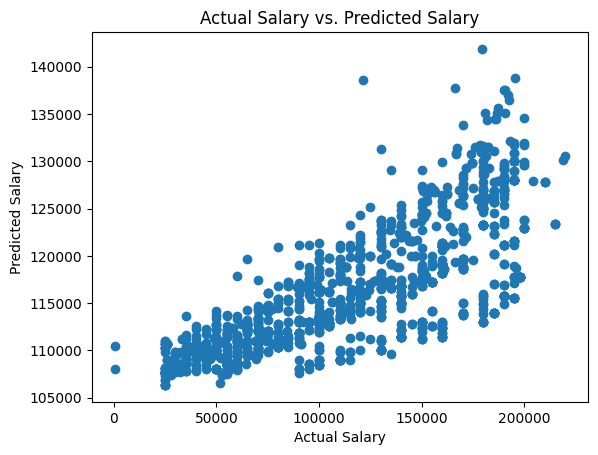

In [9]:
# Handle label encoding untuk kolom 'Job Title'
le = LabelEncoder()
df['Job Title'] = le.fit_transform(df['Job Title'])

# Pisahkan fitur dan target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Pilih kolom kategorikal yang perlu diimputasi
categorical_columns = ['Gender', 'Education Level']

# Gunakan SimpleImputer dengan strategi 'most_frequent' untuk kolom kategorikal
imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = imputer_categorical.fit_transform(X[categorical_columns])

# Gunakan SimpleImputer untuk mengisi nilai yang hilang (NaN) pada fitur numerik
imputer_numeric = SimpleImputer(strategy='mean')
X_imputed = imputer_numeric.fit_transform(X.select_dtypes(include=['number']))

# Gunakan SimpleImputer untuk mengisi nilai yang hilang (NaN) pada target
imputer_target = SimpleImputer(strategy='mean')
y_imputed = imputer_target.fit_transform(y.values.reshape(-1, 1)).ravel()

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model SVR
svr_model = SVR(kernel='linear', C=1.0)

# Latih model
svr_model.fit(X_train_scaled, y_train)

# Lakukan prediksi
y_pred = svr_model.predict(X_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualisasi prediksi vs. aktual (Opsional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual Salary vs. Predicted Salary")
plt.show()